La correlación entre los datos es: 0.8950500188020497


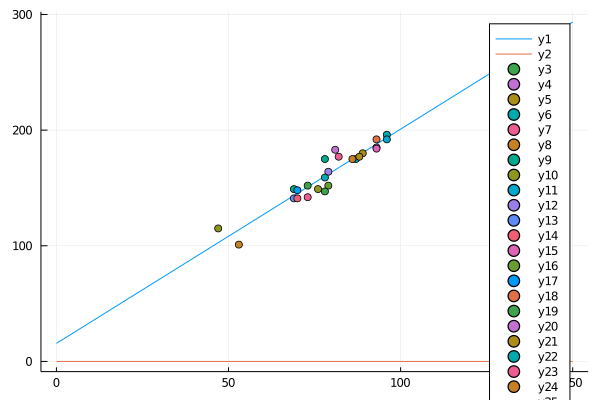

In [12]:
using Plots
function regresionLinealSimple()
    n = 25
    x = [73 93 89 96 73 53 69 47 87 79 69 70 93 79 70 93 78 81 88 78 82 86 78 76 96]
    y = [152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183 177 159 177 175 175 149 192]
    sumaX = 0.0
    sumaY = 0.0
    sumaX2 = 0.0
    sumaY2 = 0.0
    sumaXY = 0.0
    cont = 1
    a1 = 0.0
    a0 = 0.0
    st = 0.0
    sr = 0.0
    
    #Calcula la sumatoria de x y la sumatoria de x al cuadrado
    for i in x
        sumaX += i 
        sumaX2 += i^2
    end
    
    #Calcula la sumatoria de y, y la sumatoria de y al cuadrado
    for i in y
        sumaY += i 
        sumaY2 += i^2
    end
    
    #Calcula la sumatoria de x por y
    while cont <= 25
        sumaXY += x[cont]*y[cont]
        cont += 1
    end
    
    #Obtiene los valores de a1 y a0
    a1 = ((n*sumaXY)-(sumaX*sumaY))/(n*(sumaX2)-(sumaX^2))
    a0 = (sumaY/n)-a1*(sumaX/n)
    
    #Obtiene st
    for i in y
        st += (i-(sumaY/n))^2
    end
    
    cont = 1
    #Obtiene sr
    while cont <= n
        sr += (y[cont]-a0-(a1*x[cont]))^2
        cont += 1
    end
    
    rCuadrado = (st-sr)/st
    println("La medida de desempeño entre los datos es: ",rCuadrado)
    
    #Grafica la recta obtenida por la regresion lineal
    f(x) = a0+a1*x
    Plots.scatter(f)
    plot([f,zero], 0, 150)
    scatter!(x,y)

end

regresionLinealSimple()

La medida de desempeño entre los datos es: -0.720013566067811


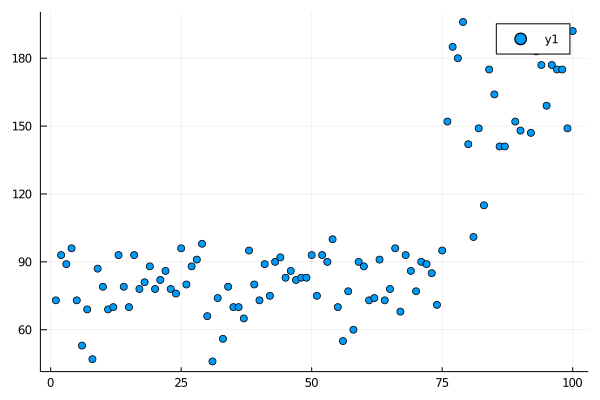

In [43]:
using Plots
function regresionLinealMultiple()
    n = 25
    x = [73 93 89 96 73 53 69 47 87 79 69 70 93 79 70 93 78 81 88 78 82 86 78 76 96]
    x2 = [80 88 91 98 66 46 74 56 79 70 70 65 95 80 73 89 75 90 92 83 86 82 83 83 93]
    x3 = [75 93 90 100 70 55 77 60 90 88 73 74 91 73 78 96 68 93 86 77 90 89 85 71 95]
    y = [152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183 177 159 177 175 175 149 192]
    sumaX = 0.0
    sumaX2 = 0.0
    sumaX3 = 0.0
    sumaY = 0.0
    sumaX2 = 0.0
    sumaX22 = 0.0
    sumaX32 = 0.0
    sumaY2 = 0.0
    sumaXY = 0.0
    sumaX2Y = 0.0
    sumaX3Y = 0.0
    sumaXX2 = 0.0
    sumaXX3 = 0.0
    sumaX2X3 = 0.0
    cont = 1
    a1 = 0.0
    a0 = 0.0
    st = 0.0
    sr = 0.0
    
    #Calcula la sumatoria de x y la sumatoria de x al cuadrado
    for i in x
        sumaX += i 
        sumaX2 += i^2
    end
    
    #Calcula la sumatoria de x2 y la sumatoria de x2 al cuadrado
    for i in x2
        sumaX2 += i 
        sumaX22 += i^2
    end
    
    #Calcula la sumatoria de x3 y la sumatoria de x3 al cuadrado
    for i in x3
        sumaX3 += i 
        sumaX32 += i^2
    end
    
    #Calcula la sumatoria de y, y la sumatoria de y al cuadrado
    for i in y
        sumaY += i 
        sumaY2 += i^2
    end
    
    #Calcula la sumatoria de x, x2, x3 por y
    while cont <= 25
        sumaXY += x[cont]*y[cont]
        sumaX2Y += x2[cont]*y[cont]
        sumaX3Y += x3[cont]*y[cont]
        sumaXX2 += x[cont]*x2[cont]
        sumaXX3 += x[cont]*x3[cont]
        sumaX2X3 += x2[cont]*x3[cont]
        cont += 1
    end
    
    matriz = [n sumaX sumaX2 sumaX3 sumaY; sumaX sumaX2 sumaXX2 sumaXX3 sumaXY; sumaX2 sumaXX2 sumaX22 sumaX2X3 sumaX2Y; sumaX3 sumaXX3 sumaX2X3 sumaX32 sumaX3Y]
    

    #En toda esta seccion se saca la triangular superior de la matriz
    cont = 1
    while cont <= 5
        multiplicacion = (matriz[1,cont]/matriz[1,1])*matriz[2,1]
        matriz[2,cont] = matriz[2,cont] - multiplicacion
        cont += 1
    end 
    
    cont = 1
    while cont <= 5
        multiplicacion = (matriz[1,cont]/matriz[1,1])*matriz[3,1]
        matriz[3,cont] = matriz[3,cont] - multiplicacion
        cont += 1
    end
    
    cont = 1
    while cont <= 5
        multiplicacion = (matriz[1,cont]/matriz[1,1])*matriz[4,1]
        matriz[4,cont] = matriz[4,cont] - multiplicacion
        cont += 1
    end
    
    cont = 2
    while cont <= 5
        multiplicacion = (matriz[2,cont]/matriz[2,2])*matriz[3,2]
        matriz[3,cont] = matriz[3,cont] - multiplicacion
        cont += 1
    end
    
    cont = 2
    while cont <= 5
        multiplicacion = (matriz[2,cont]/matriz[2,2])*matriz[4,2]
        matriz[4,cont] = matriz[4,cont] - multiplicacion
        cont += 1
    end
    
    cont = 3
    while cont <= 5
        multiplicacion = (matriz[3,cont]/matriz[3,3])*matriz[4,3]
        matriz[4,cont] = matriz[4,cont] - multiplicacion
        cont += 1
    end
    
    #Obtiene a0, a1, a2 y a3
    a3 = matriz[4,5]/matriz[4,4]
    a2 = (matriz[3,5]-(a3*matriz[3,4]))/matriz[3,3]
    a1 = (matriz[2,5]-(a3*matriz[2,4])-(a2*matriz[2,3]))/matriz[2,2]
    a0 = (matriz[1,5]-(a3*matriz[1,4])-(a2*matriz[1,3])-(a1*matriz[1,2]))/matriz[1,1]
    
    for i in y
        st += (i-(sumaY/n))^2
    end
    
    cont = 1
    #Obtiene sr
    while cont <= n
        sr += (y[cont]-a0-(a1*x[cont])-(a2*x2[cont])-(a3*x3[cont]))^2
        cont += 1
    end
    
    #Obtiene la medida de desempeño
    rCuadrado = (st-sr)/st
    println("La medida de desempeño entre los datos es: ",rCuadrado)
    
    #Grafica los puntos de todas las pruebas 
    vector = []
    append!(vector, x)
    append!(vector, x2)
    append!(vector, x3)
    append!(vector, y)
    vector2 = []
    cont2 = 1
    while cont2 <= 100
        append!(vector2, [cont2])
        cont2 += 1
    end
    plot()
    scatter!(vector2,vector)
    
end

regresionLinealMultiple()